Rostagno Andrea

295706

# Stima del reddito annuale in base ai dati del censimento

## Introduzione

In questo elaborato presenteremo ed analizzeremo il dataset "Adult" riguardante il reddito medio annuale di un campione di persone in base ai dati del censimento.<br> 
I dati sono stati presi seguendo alcune regole come:<br> 
- l'età deve essere superiore ai 16 anni<br>
- il reddito lordo rettificato della persona deve essere superiore a 100<br>
- il "peso" di ogni dato deve essere maggiore di 1
- La persona deve lavorare più di 0 ore alla settimana
- Il compito di previsione consiste nel determinare se una persona guadagna oltre 50.000$ all'anno.

L'analisi procederà in questa maniera:
1. Pulizia del database e visualizzazione di alcuni dati
2. Utilizzo di tecniche per la riduzione di dimensionalità messe a confronto come la PCA e la MDA
3. Utilizzo di tecniche di predizione come la LDA e la SVM

Durante il procedimento cercheremo di visualizzare il più possibile i vari risultati ottenuti.

## Il dataset

Qui in allegato è presente il link diretto del dataset:<br>
https://archive.ics.uci.edu/dataset/2/adult <br>
<br>
Il dataset contiene 32561 campioni relativi a persone differenti e 14 features che andremo ora ad elencare.<br>
1. **Age** (Età): assume valori interi e non presenta valori mancanti
2. **Workclass** (Classe di lavoro): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Presenta valori mancanti
3. **Fnlwgt** (Peso finale): indica quella data persona quanta popolazione rappresenta, serve per fare una media ponderata. Assume solo valori interi e non presenta valori mancanti
4. **Education** (Titoli di studio): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Non presenta dati mancanti
5. **Education-num** (Voto): Solo numeri interi e nessun dato mancante
6. **Marital-status** (Stato civile): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Nessun dato mancante
7. **Occupation** (Lavoro): Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Sono presenti dei dati mancanti
8. **Relationship** (Relazione): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Nessun dato mancante
9. **Race**(Etnia): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Nessun dato mancante
10. **Sex**(Sesso): Female, Male. Nessun dato mancante
11. **Capital-gain**(): Rappresenta il guadagno di capitale, ovvero quando vendi un qualcosa ad un prezzo superiore del prezzo di acquisto (p.e. acquisti delle azioni a 1000$ e le rivendi a 1500$, il guadagno capitale è di 500$). Assume solo valori interi e non presenta nessun dato mancante.
12. **Capital-loss**(): Rappresenta la perdita di capitale, ovvero quando vendi un qualcosa ad un prezzo inferiore del prezzo di acquisto (p.e. acquisti delle azioni a 1500$ e le rivendi a 1000$, la perdita capitale è di 500$). Assume solo valori interi e non presenta nessun dato mancante.
13. **Hours-per-week**(Ore settimanali lavorative): Assume solo valori interi e non presenta nessun dato mancante.
14. **Native-country**(Nazionalità): United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Presenta dei dati mancanti

Invece per quanto riguarda gli attributi avremo la casella **income** (guadagno) che avrà come valori >50K, <=50K.



## 1. Pulizia e visualizzazione del dataset

In [2]:
#%matplotlib widget
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from FisherDA import MultipleFisherDiscriminantAnalysis as MDA
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, fbeta_score


In [3]:
#importiamo il dataset
adult = pd.read_csv('adult.data', header=None,na_values=" ?")
adult_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
adult.rename(columns={k:adult_columns[k] for k in range(len(adult_columns))}, inplace=True)

display(adult)

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#elimino tutte le righe con valori nulli e salvo le dimensioni
adult_b = adult.dropna()
M,N = adult_b.shape
adult['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [6]:
#mostro che la maggior parte dei dati eliminati guadagna meno di 50k(però non è un problema perchè la differenza è ancora sostanziale)
adult_b['income'].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

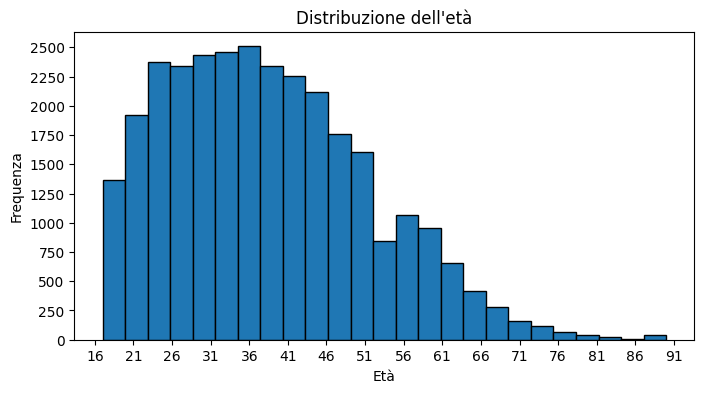

"L'età media ponderata è: 38.0 anni"

In [7]:
#una distribuzione dell'età
plt.figure(figsize=(8, 4))
plt.hist(adult_b['age'], bins=25, edgecolor='black')
plt.title('Distribuzione dell\'età')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.xticks(ticks=np.arange(16,92,5), labels=[f'{i}' for i in range(16,92,5)])
plt.yticks(ticks=np.arange(0,2750,250), labels=[f'{i}' for i in range(0,2750,250)])
plt.grid(False)
plt.show()

average_age = np.round((adult_b['age']*adult_b['fnlwgt']).sum()/adult_b['fnlwgt'].sum())
display("L'età media ponderata è: "+str(average_age)+" anni")


In [9]:
#trasformo le colonne object in category
adult_b=adult_b.astype({"workclass":'category', "education":'category', "marital-status":'category', "occupation":'category', "relationship":'category',"race":'category',"sex":'category',"native-country":'category',"income":'category'})      

#Visto che le classi income sono due (>50k, <=50k), per esse possiamo anche utilizzare un label encoding. Per le features adotteremo invece sempre il one-hot encoding
adult_work=adult_b.copy()
le=LabelEncoder()
le.fit(adult_work['income'].values)
adult_work['income']=le.transform(adult_work['income'].values)

#one-hot encoding
onehot_cols=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race','sex','native-country']
adult_work_old=adult_work.copy()
adult_work=pd.get_dummies(adult_work, columns=onehot_cols)
adult_work=adult_work.astype(int)
col_to_move = adult_work.columns[6]
new_pos = 104
cols = adult_work.columns.tolist()
cols.insert(new_pos, cols.pop(cols.index(col_to_move)))
adult_work = adult_work[cols]

display(adult_work)



age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           0                     0                   1   
3                           0                     0                   1   
4                           0                     0                   1   
...                       ...                   ...                 ...   
32556                       0                     0                   1   
32557                       0                     0                   1   
32558                       0                     0                   1   
32559                       0                     0                   1   
32560                       0                     0                   0   

       workclass_ Self-emp-inc  ...  native-country_ Puerto-Rico  \
0                            0  ...                            0   
1                            0  ...                            0   
2                            0  ...                            0   
3                            0  ...                            0   
4                            0  ...                            0   
...                        ...  ...                          ...   
32556                        0  ...                            0   
32557                        0  ...                            0   
32558                        0  ...                            0   
32559                        0  ...                            0   
32560                        1  ...                            0   

       native-country_ Scotland  native-country_ South  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   
...                         ...                    ...   
32556                         0                      0   
32557                         0                      0   
32558                         0                      0   
32559                         0                      0   
32560                         0                      0   

       native-country_ Taiwan  native-country_ Thailand  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   
...                       ...                       ...   
32556                       0                         0   
32557                       0                         0   
32558                       0                         0   
32559                       0

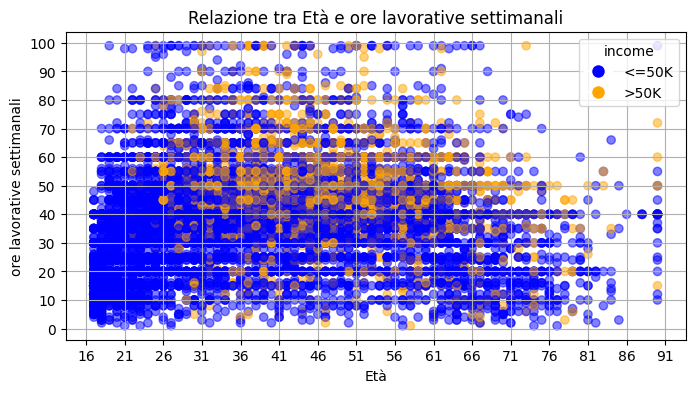

In [10]:
#mostriamo la relazione tra età e ore settimanali lavorative
cmap=ListedColormap(['blue', 'orange'])
plt.figure(figsize=(8, 4))
plt.scatter(adult_work_old['age'], adult_work_old['hours-per-week'], c=adult_work_old['income'],cmap=cmap, alpha=0.5)
plt.title('Relazione tra Età e ore lavorative settimanali')
plt.xlabel('Età')
plt.ylabel('ore lavorative settimanali')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(0), markersize=10, label='<=50K'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(1), markersize=10, label='>50K')]
plt.legend(handles=handles, title='income')
plt.xticks(ticks=np.arange(16,92,5), labels=[f'{i}' for i in range(16,92,5)])
plt.yticks(ticks=np.arange(0,110,10), labels=[f'{i}' for i in range(0,110,10)])
plt.grid(True)
plt.show()

Notiamo che tra i 16 e i 26 anni tutte le persone che lavorano fino a 40 ore settimanali **non guadagnano** più di 50k al mese.<br>
Le persone che **guadagnano** di più invece si trovano in un età compresa tra i 31 e i 61 anni e lavorano tra le 40 e le 70 ore a settimana.

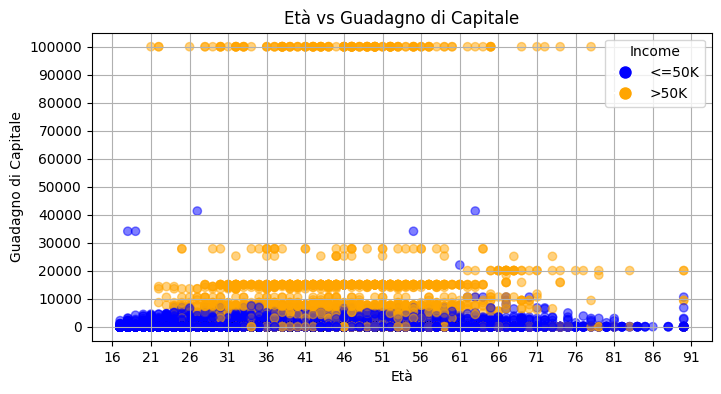

In [11]:
#mostriamo la relazione tra guadagni da investimenti ed età
plt.figure(figsize=(8, 4))
plt.scatter(adult_work_old['age'], adult_work_old['capital-gain'], c=adult_work_old['income'], cmap=cmap, alpha=0.50)
plt.title('Età vs Guadagno di Capitale')
plt.xlabel('Età')
plt.ylabel('Guadagno di Capitale')
plt.legend(handles=handles, title='Income')
plt.xticks(ticks=np.arange(16,92,5), labels=[f'{i}' for i in range(16,92,5)])
plt.yticks(ticks=np.arange(0,110000,10000), labels=[f'{i}' for i in range(0,110000,10000)])
plt.grid(True)
plt.ion()
plt.show()

Anche qui un altro dato interessante, praticamente tutti quelli che guadagnano più di 50k all'anno percepiscono almeno 10k da investimenti.<br>
Mentre chi guadagna meno di 50k non percepisce oltre 5.000$ da investimenti vari.

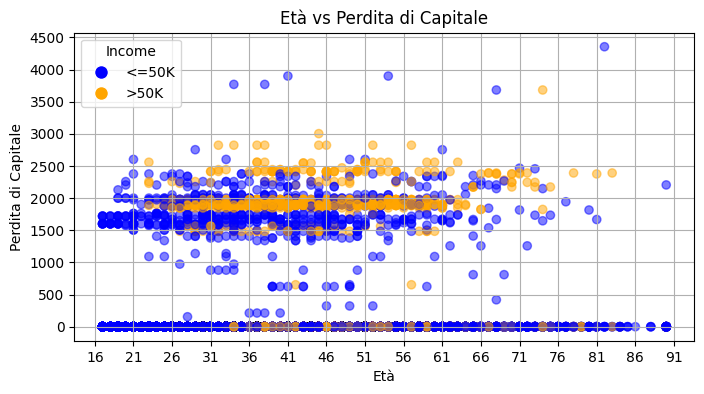

In [12]:
#mostriamo la relazione tra ore lavorative settimanali e il peso che hanno sui dati
plt.figure(figsize=(8, 4))
plt.scatter(adult_work_old['age'], adult_work_old['capital-loss'],  c=adult_work_old['income'], cmap=cmap, alpha=0.5)
plt.title('Età vs Perdita di Capitale')
plt.xlabel('Età')
plt.ylabel('Perdita di Capitale')
plt.legend(handles=handles, title='Income')
plt.xticks(ticks=np.arange(16,92,5), labels=[f'{i}' for i in range(16,92,5)])
plt.yticks(ticks=np.arange(0,5000,500), labels=[f'{i}' for i in range(0,5000,500)])
plt.grid(True)
plt.show()

Chi guadagna di più sembra avere due "stop-loss", il primo a 2000 e il secondo a 2500.<br>
Si nota inoltre che le perdite per investimenti sono concentrate tra i 16 e i 61 anni di età, successivamente diminuiscono nettamente.

In [13]:
#mostriamo la correlazione tra le variabili
adult_work.iloc[:, :-1].corr()

age    fnlwgt  education-num  \
age                              1.000000 -0.076511       0.043526   
fnlwgt                          -0.076511  1.000000      -0.044992   
education-num                    0.043526 -0.044992       1.000000   
capital-gain                     0.080154  0.000422       0.124416   
capital-loss                     0.060165 -0.009750       0.079646   
...                                   ...       ...            ...   
native-country_ Thailand        -0.004940 -0.001241       0.008183   
native-country_ Trinadad&Tobago  0.007868 -0.000413      -0.017134   
native-country_ United-States    0.016259 -0.083390       0.127207   
native-country_ Vietnam         -0.017775 -0.010761      -0.010953   
native-country_ Yugoslavia       0.000657  0.005707      -0.001661   

                                 capital-gain  capital-loss  hours-per-week  \
age                                  0.080154      0.060165        0.101599   
fnlwgt                               0.000422     -0.009750       -0.022886   
education-num                        0.124416      0.079646        0.152522   
capital-gain                         1.000000     -0.032229        0.080432   
capital-loss                        -0.032229      1.000000        0.052417   
...                                       ...           ...             ...   
native-country_ Thailand            -0.003501     -0.005191        0.012846   
native-country_ Trinadad&Tobago     -0.003603      0.008849       -0.007566   
native-country_ United-States        0.012375      0.015119        0.010673   
native-country_ Vietnam             -0.002493      0.000344       -0.010381   
native-country_ Yugoslavia          -0.002317     -0.005036        0.006983   

                                 workclass_ Federal-gov  workclass_ Local-gov  \
age                                            0.056626              0.068256   
fnlwgt                                        -0.006932             -0.003520   
education-num                                  0.058244              0.097378   
capital-gain                                  -0.006299             -0.009624   
capital-loss                                   0.010380              0.014727   
...                                                 ...                   ...   
native-country_ Thailand                      -0.004266             -0.006441   
native-country_ Trinadad&Tobago               -0.004390             -0.001255   
native-country_ United-States                  0.017541              0.032937   
native-country_ Vietnam                       -0.000004             -0.003952   
native-country_ Yugoslavia                    -0.004139             -0.000550   

                                 workclass_ Private  workclass_ Self-emp-inc  \
age                                       -0.210491                 0.111039   
fnlwgt                                     0.046589                -0.025496   
education-num                             -0.165069                 0.078843   
capital-gain                              -0.048185                 0.096482   
capital-loss                              -0.036377                 0.030956   
...                                             ...                      ...   
native-country_ Thailand                  -0.008144                 0.018052   
native-country_ Trinadad&Tobago            0.002164                 0.002630   
native-country_ United-States             -0.049809                 0.007350   
native-country_ Vietnam                    0.009369                -0.004973   
native-country_ Yugoslavia                 0.003861                 0.003343   

                                 ...  native-country_ Portugal  \
age                              ...                  0.001062   
fnlwgt                           ...                 -0.014020   
education-num                    ...                 -0.043058   
capital-gain                     ...              

# PCA

### Introduzione<br>
Quando ci troviamo ad operare in situazioni in cui si hanno dati con un gran numero di dimensioni, è naturale pensare di <br>
proiettare questi dati in un sottospazio di dimensionalità inferiore, cercando di non perdere informazione importante sulle variabili originarie.<br>
Un modo per ottenere tale riduzione è attraverso la selezione delle variabili, chiamata anche “feature selection”.<br>
La **Principal Component Analysis** (PCA) è una tecnica finalizzata a ridurre la dimensionalità di un insieme di dati con<br>
 finalità esplorativa o di visualizzazione dei dati, per un eventuale uso in analisi successive.<br>
 

### Procedimento<br>

Supponiamo di trovarci in uno spazio $\mathbb{R}^{d}$ e di volere una funzione lineare ${f}$ tali che ${f} : \mathbb{R}^d\rightarrow \mathbb{R}^e$ ma al contempo un'altra funzione lineare ${g}$ tali che ${g} : \mathbb{R}^e\rightarrow\mathbb{R}^d$, con ${e}$ &lt; ${d}$ . <br>
Associamo a queste due trasformazioni le loro corrispettive matrici ${U}\in\mathbb{R}^{e\times d}$ e  ${V}\in\mathbb{R}^{d\times e}$<br>
Il nostro campione ${S}$ ha distribuzione ${D}^{m}$ ovvero ${S}=\{\boldsymbol{p}_1,\ldots ,\boldsymbol{p}_m\}$.<br>
Il nostro obbiettivo è quello di trovare le due migliori funzioni lineari che permettano di fare questo procedimento minimizzando la perdita di informazione.<br>
<br>
Formalizziamo:<br>

$\underset{U,V}{\text{argmin}} \sum_{i=1}^{m} \left\| p_i - {VU}p_i \right\|^2_2$

Ora dobbiamo trovare una matrice ${U}\in\mathbb{R}^{e\times d}$ e una matrice ${V}\in\mathbb{R}^{d\times e}$ che siano soluzione del problema di minimizzazione.<br>
1. Dobbiamo calcolare una matrice ${A}=\sum_{i=1}^{m} \vec{p_i} \vec{p_i}^T$  dove $p_i$ è un vettore noto di dimensione ${d} \times{1}$.<br>
2. La matrice ${A}$ può anche essere calcolata come ${A}={X}^T{X}$ dove ${X}$ è la matrice che ha come righe i campioni di ${S}$ quindi avrà dimensione ${m} \times{d}$.<br>
   - Notiamo inoltre che ${A}^T={X}^T{X}={A}$ quindi la matrice ${A}$ è semidefinita positiva.<br>
3. Tramite la scomposizione (SVD) diventa ${A}={B}{D}{B}^T$ dove ${D}$ è la matrice con gli  autovalori di ${A}$ posti in ordine decrescente mentre la matrice ${B}$ è la matrice con colonne gli autovettori ad essi associati.<br>
   - Possiamo dedurre che le **componenti principali** saranno gli autovettori della matrice ${B}$ e che le matrici incognite saranno appunto ${V}$ con colonne i primi ${e}$ autovettori e ${U}$ sarà uguale a ${V}^T$.<br>
   
Riformuliamo il problema:<br>

$\underset{V}{\text{argmax}} \text{ trace} ({V}^T(\sum_{i=1}^m \vec{p_i} \vec{p_i}^T ){V}) $<br>

${V}{V}^T={I}$<br>
${V}\in\mathbb{R}^{d\times e}$<br>

Adesso che abbiamo ottenuto le matrice ${V}$ (${U}={V}^T$ ) e che sappiamo che ha come colonne gli autovettori associati agli autovalori di ${A}$ in ordine decrescente ci domandiamo:<br>
ma quanto stiamo sbagliando a passre da uno spazio di dimensione ${d}$ ad uno spazio di dimensione ${e}$ ?<br>

$\sum_{i={e}+1}^{d} \lambda_i({A}) $

Ovvero sommiamo gli autovalori che sono stati eliminati.<br>










### Varianza spiegata<br>
Per costruzione, la varianza totale si può scrivere:
$\sum_{i=1}^{d} \lambda_i = \text{tr}({A})$

dove il parametro $\lambda_i$ rappresenta la varianza spiegata dall' i-esima componente principale.<br>
$\frac{\lambda_i}{\text{tr}({A})} = \frac{\lambda_i}{\sum_{j}\lambda_j} = \text{PVE}_i$

Grazie a questo calcolo si può quantificare quanta "informazione" porta ogni componente principale.<br>
Non c'è un modo preciso per scegliere quante componenti principali vogliamo, ma generalmente si sceglie in base a quanta informazione vogliamo tenere (p.e. 0.90 , quante PC corrispondono? ) o a problemi di rappresentazione (p.e. 2 o 3 PC per la raffigurazione dei dati). <br>
Un altro modo di visualizzare la varianza è tramite la varianza cumulata (CPVE):<br>
a differenza della PVE che calcola in ogni PC la porzione di varianza che contiene, la CPVE mostra quanta varianza è stata rappresentata fino a quella PC.<br>
Sia ${k}$ riferito alla PC di riferimento, allora la CPVE in quel punto sarà: $\frac{\sum_{i=1}^{k}\lambda_i}{\text{tr}({A})} = \text{CPVE}_i$


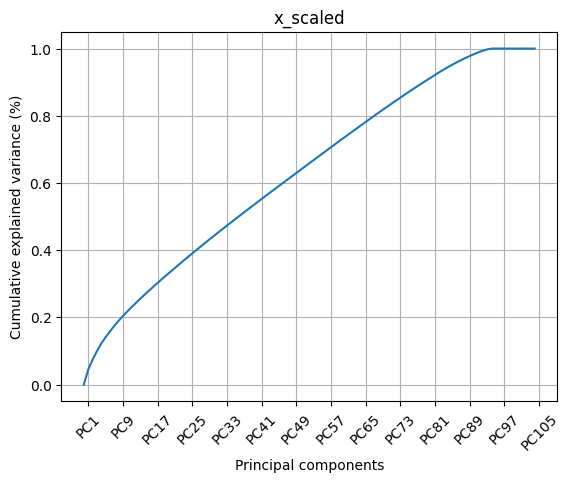

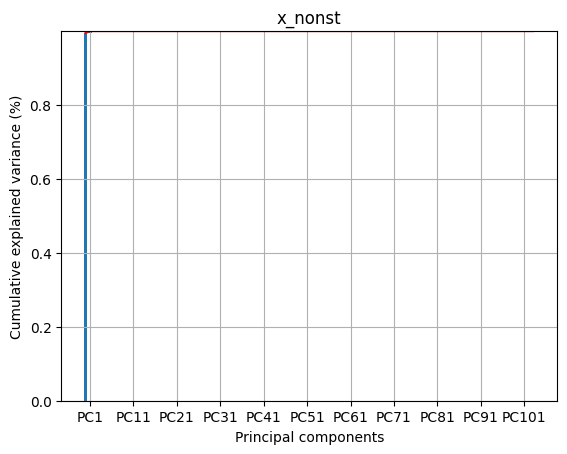

In [14]:
#separiamo le classi dalle features
x=adult_work.iloc[:, :-1].values
y=adult_work['income'].values

#generiamo il training
random_seed = 42  
test_p = 0.50  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_p, random_state=random_seed, shuffle=True)

#standardizzo
scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_scaled = scaler_X.transform(X_train)

#applichiamo la PCA sia st che nonst
pca=PCA()
pca_nonst=PCA()
pca.fit(X_scaled)
pca_nonst.fit(X_train)    

#mostriamo la varianza spiegata
plt.figure()
plt.plot(np.insert(np.cumsum(pca.explained_variance_ratio_), 0, 0))
plt.title('x_scaled')
plt.xticks(ticks=np.arange(1,pca.n_components_+3,8), 
           labels=[f'PC{i}' for i in range(1, pca.n_components_ + 3,8)], rotation=45)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_nonst.n_components_), pca_nonst.explained_variance_ratio_, bottom=np.insert(np.cumsum(pca_nonst.explained_variance_ratio_), 0, 0)[:-1])
plt.plot(np.cumsum(pca_nonst.explained_variance_ratio_), 'r')
plt.title('x_nonst')
plt.xticks(ticks=np.arange(1,pca_nonst.n_components_,10), 
           labels=[f'PC{i}' for i in range(1, pca_nonst.n_components_ + 1,10)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()
plt.show()



In [15]:
#scegliamo il numero di componenti principali in base alla varianza spiegata
explvar_p = 0.90
pca=PCA(explvar_p)
pca.fit(X_scaled)
pca_adult=pca.transform(X_scaled)

#trasformo i miei dati originali in quelli trasformati dalla PCA
features_scalate=scaler_X.transform(x)
Zpca = pca.transform(features_scalate)

df_pca = pd.DataFrame({'val': [pca.n_components_, np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)


val
n. PC           79.00
expl. Var. (%)  90.51

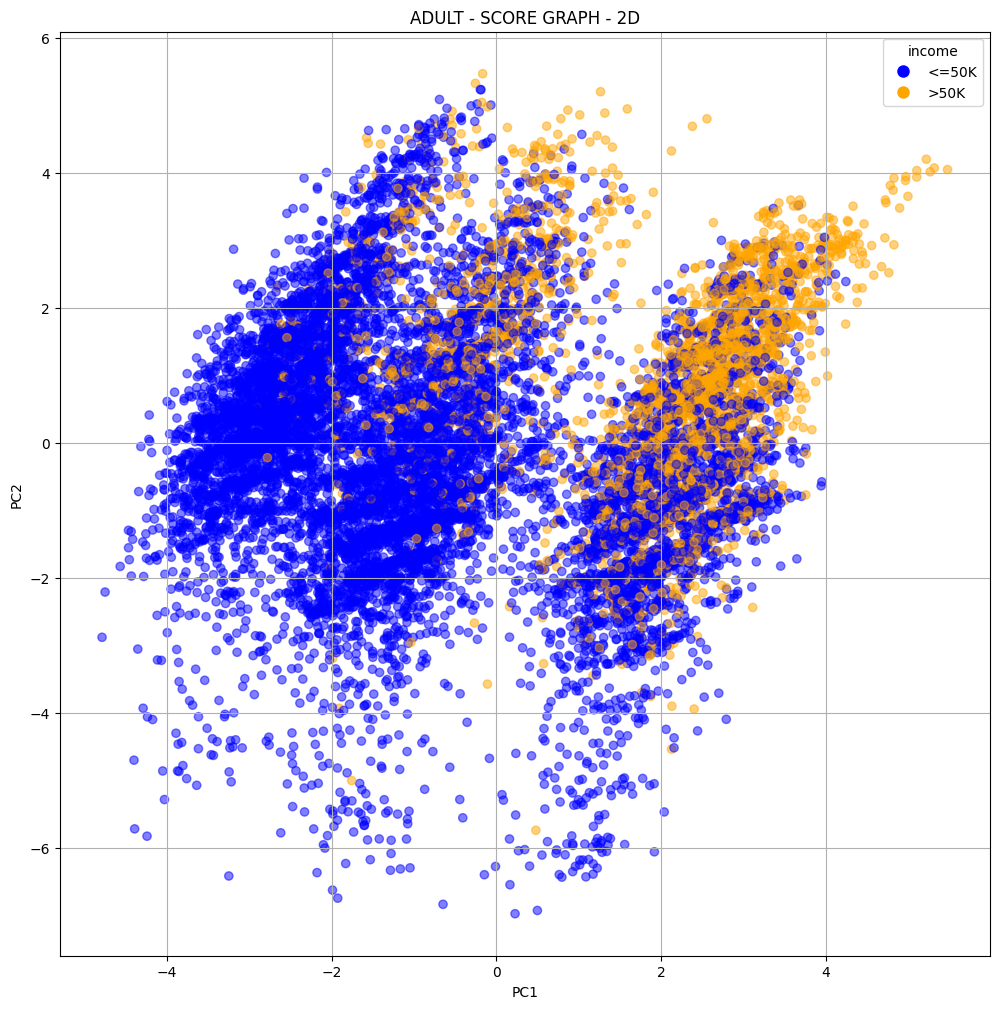

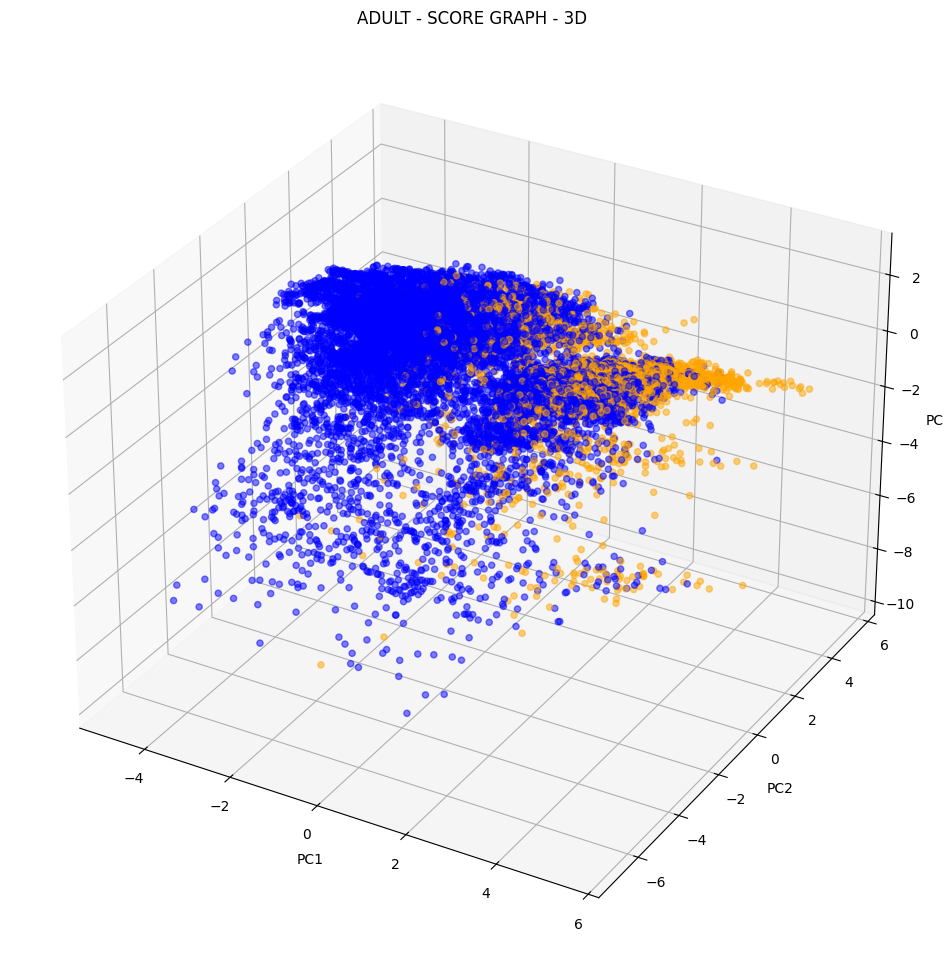

In [16]:
#mostriamo il grafico a dispersione
plt.figure(figsize=(12, 12))
plt.scatter(pca_adult[:, 0], pca_adult[:, 1], c=y_train, cmap=cmap, alpha=0.5)
plt.title('ADULT - SCORE GRAPH - 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=handles, title='income')
plt.grid()
plt.show()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_adult[:, 0], pca_adult[:, 1],pca_adult[:,2], c=y_train, cmap=cmap, alpha=0.5)
plt.title('ADULT - SCORE GRAPH - 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

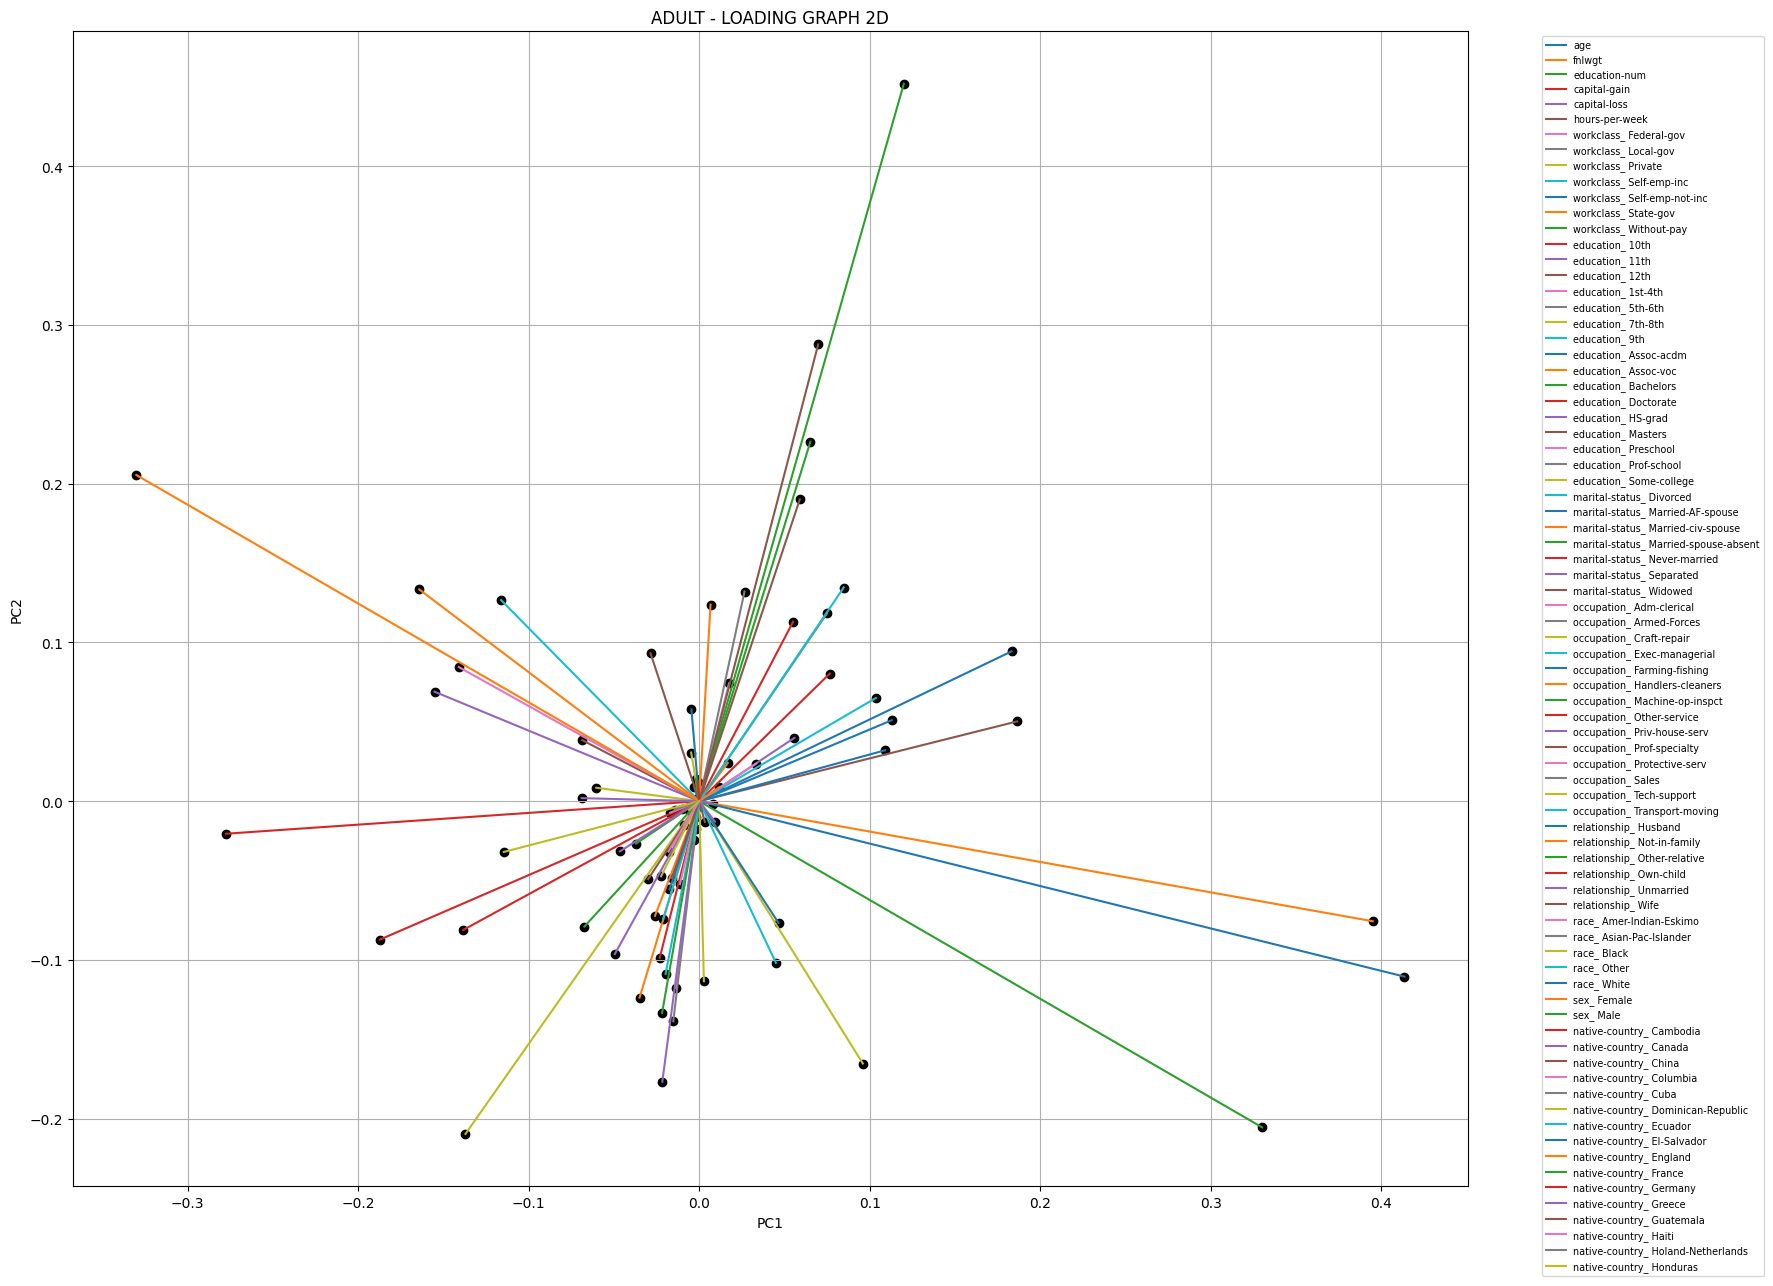

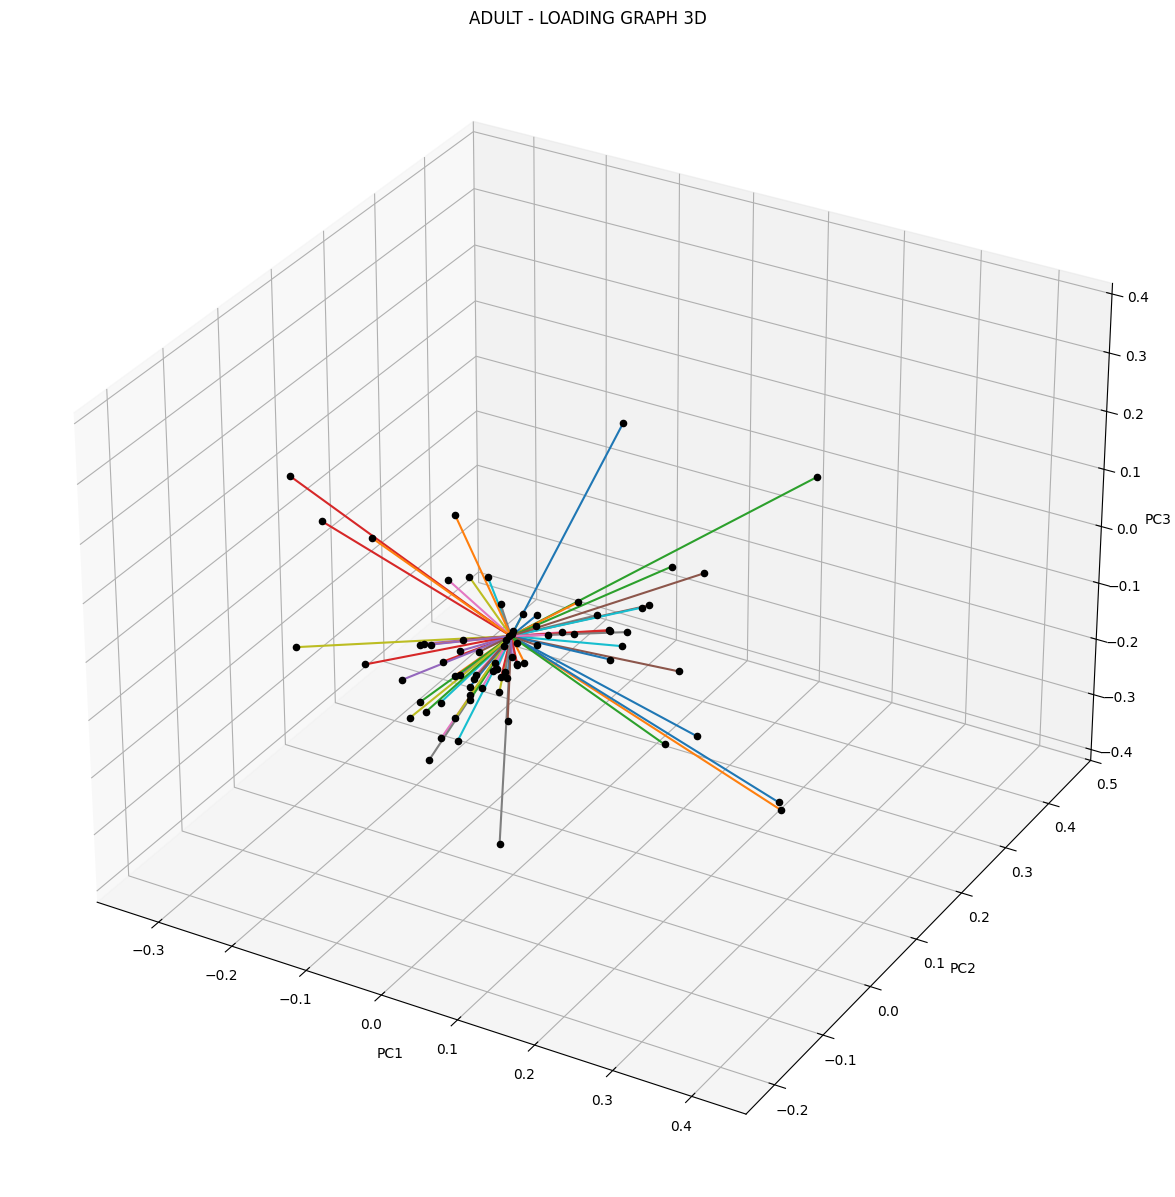

In [17]:
#mostriamo la correlazione tra le componenti principali e le features
plt.figure(figsize=(18, 15))
for i in range(pca.n_components_):
    plt.plot([0, pca.components_[0, i]], [0, pca.components_[1, i]], label=adult_work.iloc[:, :-1].columns[i])
    plt.scatter(pca.components_[0, i], pca.components_[1,i], c='k')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='x-small')
plt.title('ADULT - LOADING GRAPH 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

fig = plt.figure(figsize=(18, 15))   
ax = fig.add_subplot(111, projection='3d')
for i in range(pca.n_components_):
    ax.plot([0, pca.components_[0, i]], [0, pca.components_[1, i]], [0, pca.components_[2, i]])
    ax.scatter(pca.components_[0, i], pca.components_[1, i], pca.components_[2, i], c='k')
plt.title('ADULT - LOADING GRAPH 3D')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()


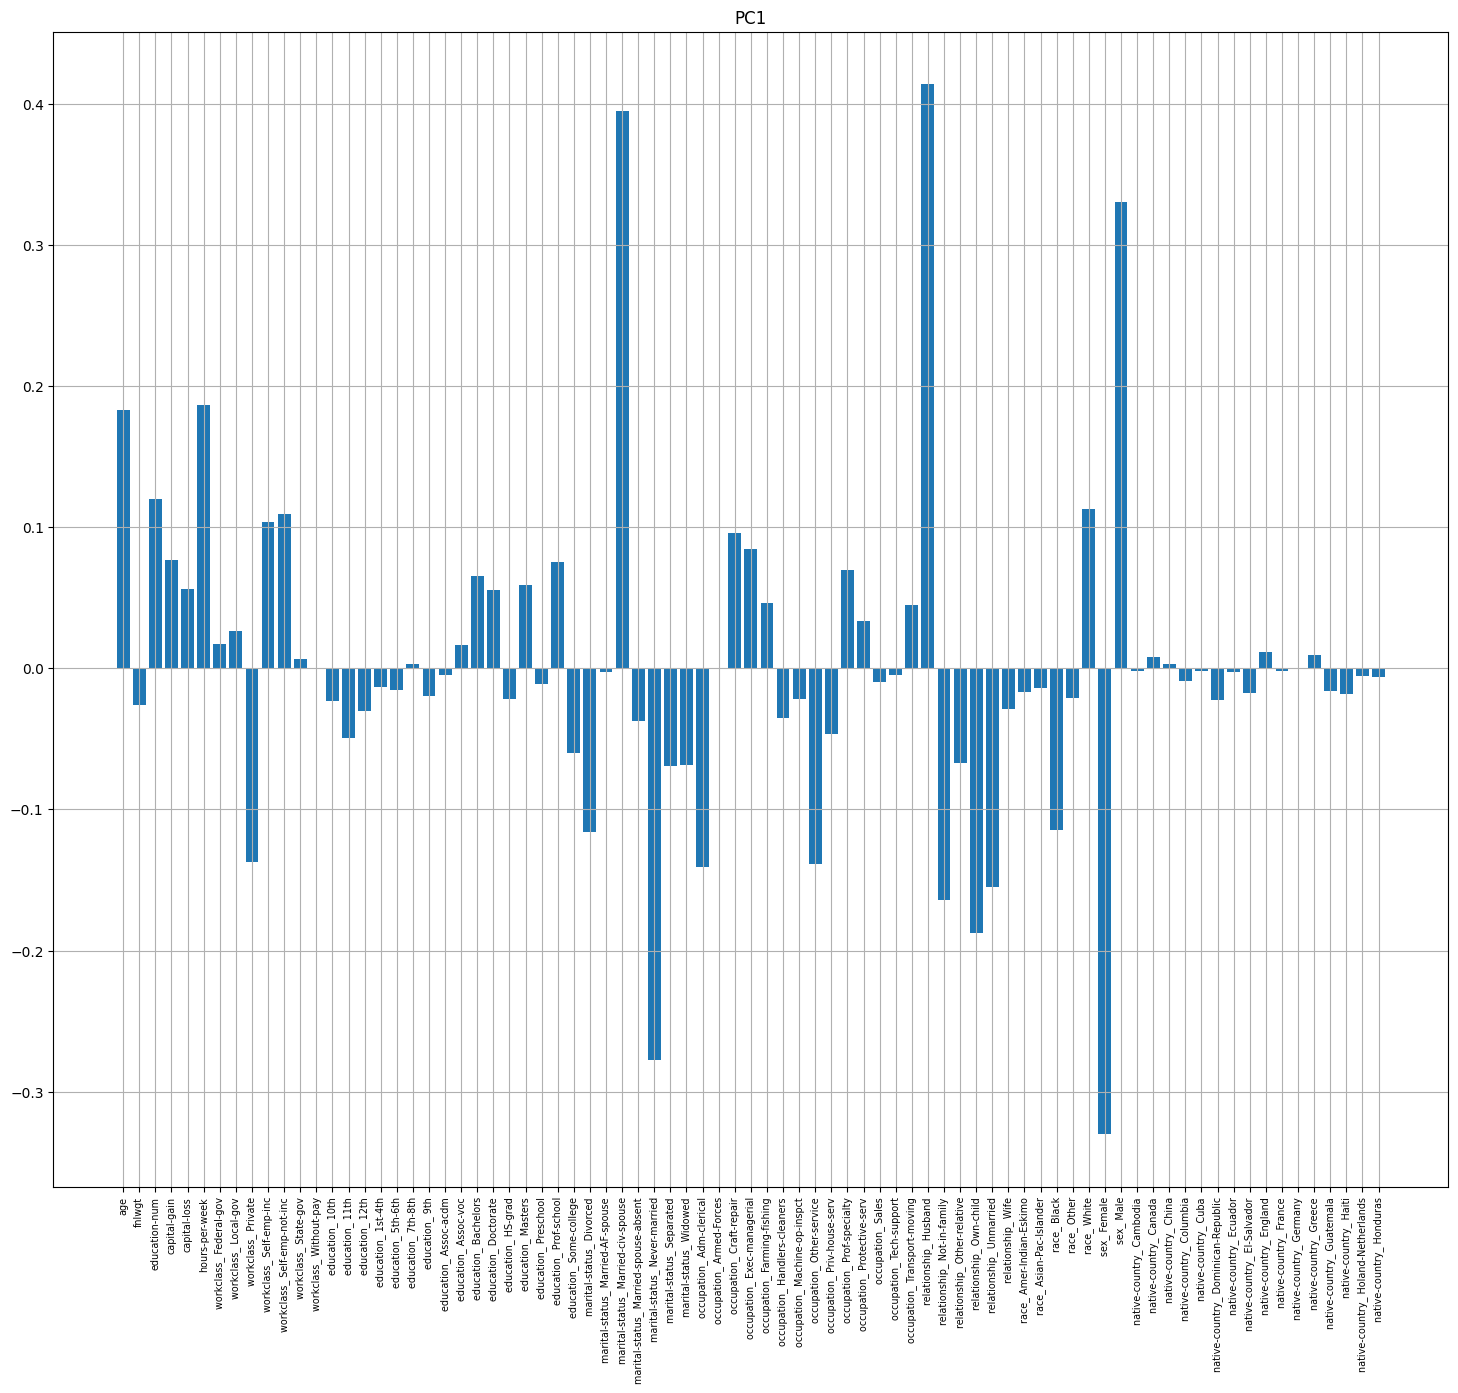

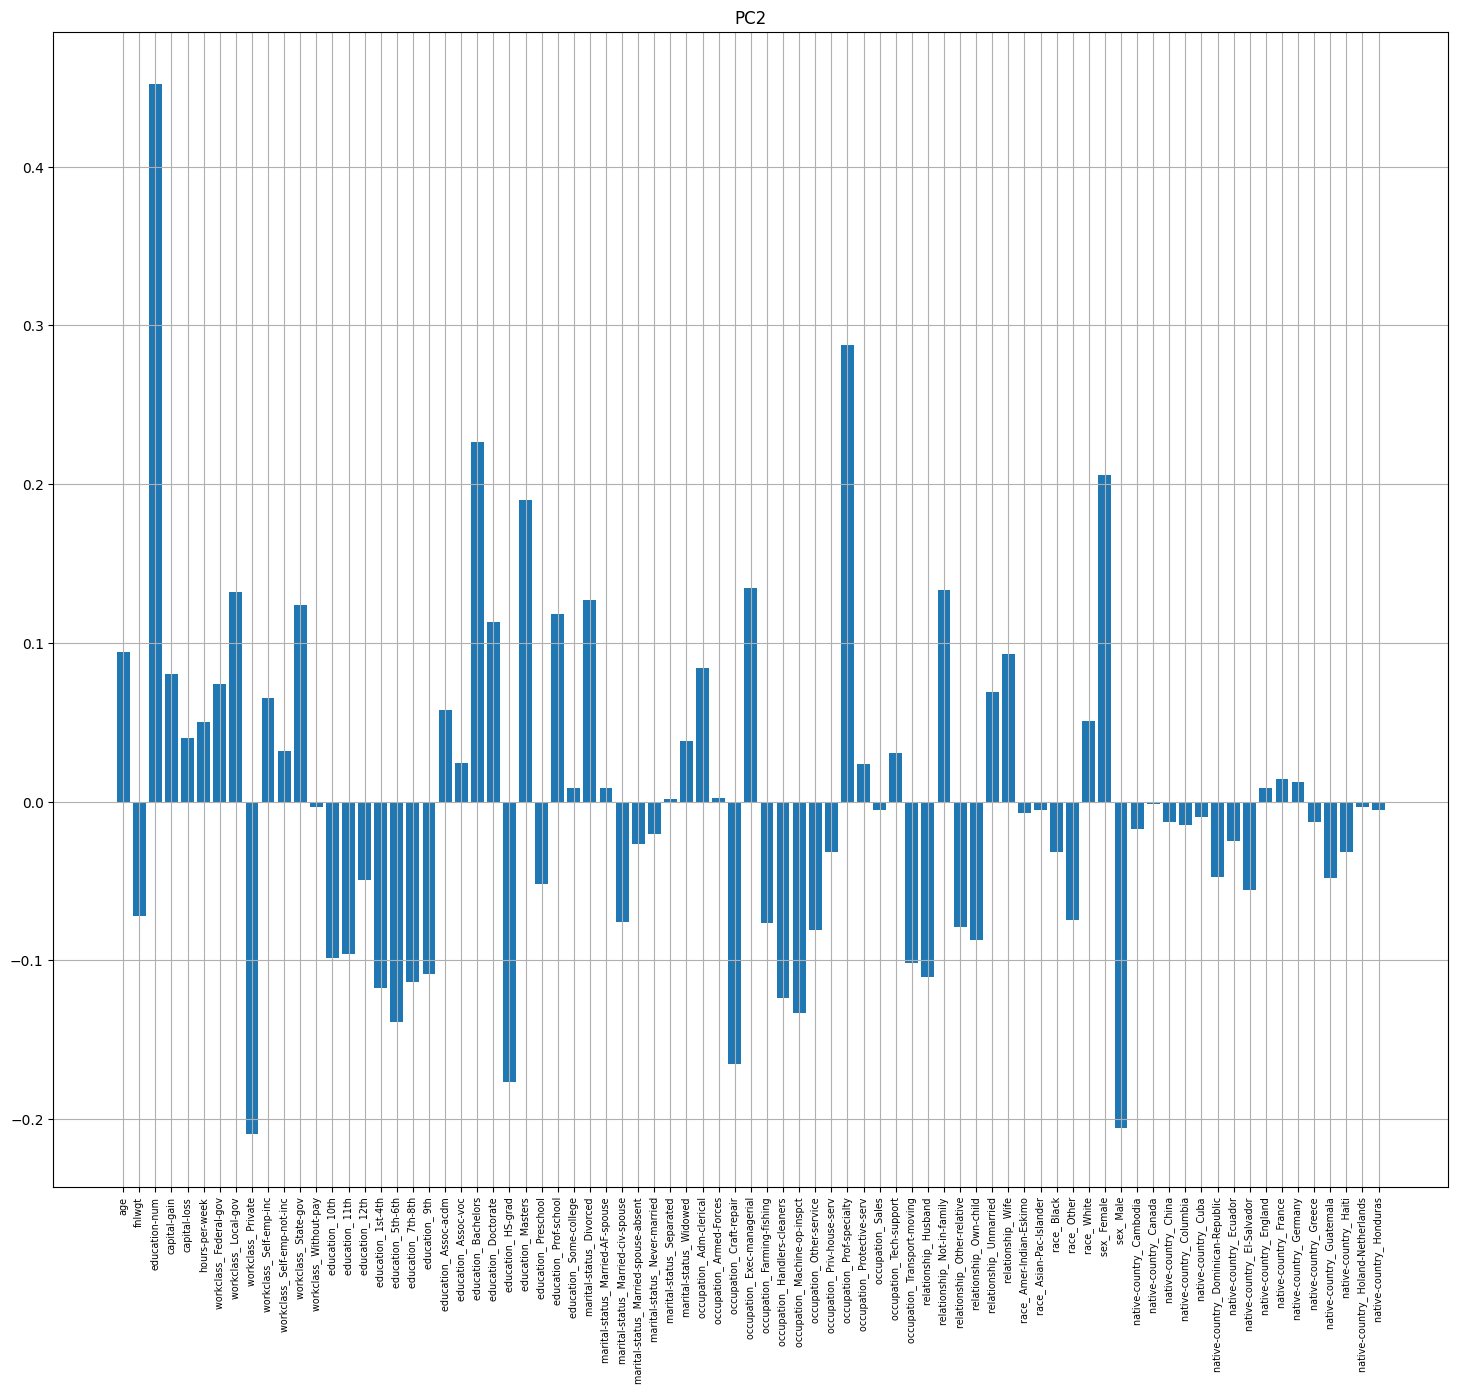

In [18]:
#tramite dei barplot mostriamo la correlazione tra le componenti principali e le features
plt.figure(figsize=(18, 15))
plt.bar(np.arange(0,pca.n_components_,1), pca.components_[0, :-25])
col_n=[None]*pca.n_components_
for i in range(pca.n_components_):
    col_n[i]=adult_work.iloc[:, :-1].columns[i]
plt.xticks(ticks=np.arange(pca.n_components_), labels=col_n,rotation=90, fontsize='x-small')
plt.title('PC1')
plt.grid()
plt.show()

plt.figure(figsize=(18, 15))
plt.bar(np.arange(0,pca.n_components_,1), pca.components_[1, :-25])
col_n=[None]*pca.n_components_
for i in range(pca.n_components_):
    col_n[i]=adult_work.iloc[:, :-1].columns[i]
plt.xticks(ticks=np.arange(pca.n_components_), labels=col_n,rotation=90, fontsize='x-small')
plt.title('PC2')
plt.grid()
plt.show()

# MDA

### Introduzione<br>
**Fisher Discriminant Analysis** (FDA) è una tecnica di riduzione della dimensionalità e classificazione che proietta i dati suddivisi in $c\in\mathbb{N}$ classi, in uno spazio di dimensione $1\leq m \leq (c-1)$ cercando di massimizzare la separazione tra le classi dei dati.<br>
L'obiettivo è trovare un asse che massimizzi la distanza tra i centri delle classi e minimizzi la varianza all'interno delle classi.<br>
Usare la FDA equivale a dire che si usa una trasformazione che preserva la classificazione dei dati.<br>
MDA è particolarmente utile quando si lavora con dataset di alta dimensione e si desidera ridurre la dimensionalità mantenendo la separazione tra le classi per migliorare la classificazione<br>
 (p.e. se nel dataset sono presenti solo due classi non è molto utile in quanto, rispetto alla formula, proietterà i dati in un'unica dimensione).



### Differenze tra PCA e MDA

**Principal Component Analysis (PCA)** e **Multiple Discriminant Analysis (MDA)** (nota anche come Fisher Discriminant Analysis, FDA) sono entrambe tecniche di riduzione della dimensionalità, ma con obiettivi e approcci differenti.

#### PCA
- **Obiettivo**: Ridurre la dimensionalità massimizzando la varianza dei dati.
- **Metodo**: Trova le componenti principali che spiegano la maggior parte della varianza nei dati.
- **Uso**: Adatto per l'analisi esplorativa dei dati e la compressione dei dati.
- **Unsupervised learning**: Non utilizza informazioni sulle etichette delle classi.

#### MDA (FDA)
- **Obiettivo**: Ridurre la dimensionalità massimizzando la separazione tra le classi.
- **Metodo**: Trova la proiezione lineare che massimizza la distanza tra i centri delle classi e minimizza la varianza all'interno delle classi.
- **Uso**: Adatto per problemi di classificazione supervisionata.
- **Supervised learning**: Utilizza informazioni sulle etichette delle classi.


### Procedimento<br>
Utilizziamo un campione ${S}=\{\boldsymbol{x}_1,\ldots ,\boldsymbol{x}_k\}\subset\mathbb{R}^d$ e una vettore classe ${c}=\{\boldsymbol{c}_1,\ldots ,\boldsymbol{c}_3\}$ (supponiamo di avere 3 classi)

1. **Calcolo dei Vettori Medi**<br>

    Calcolare il vettore medio per ciascuna classe.

    $\mu_i = \frac{1}{N_i} \sum_{x_k \in c_i} x_k$
    
    dove ${N_i}$ è il numero di campioni della classe ${c_i}$ mentre ${x_k}$ sono sono i campioni di classe ${c_i}$.<br>
    Al termine di questa operazione avremo ${i}$ vettori media distinti (p.e. se ho 3 classi 0,1,2 avrò tre vettori) dove ciascuno sarà ottenuto esclusivamente dai campioni appartenenti a quella classe.
    
2. **Matrice di Scatter Within-Class (Sw)**<br>

    Calcolare la matrice di scatter all'interno delle classi.
    
    $S_w = \sum_{i=1}^{c} \sum_{x_k \in c_i} (x_k - \mu_i)(x_k - \mu_i)^T$
    
    dove ${c}$ è il numero di classi.<br>
    Questa matrice $S_w$ somma tra loro le matrici ottenute centrando tutti i campioni con le loro rispettive medie e moltiplicandoli tra loro,<br> assomiglia a una parte della formula per calcolare la matrice di covarianza: $S = \frac{1}{N-1} \sum_{i=1}^{N} (x_i - \mu)(x_i - \mu)^T$ .

3. **Matrice di Scatter Between-Class (Sb)**<br>

    Calcolare la matrice di scatter tra le classi.
    
    $S_b = \sum_{i=1}^{c} N_i (\mu_i - \mu)(\mu_i - \mu)^T$
    
    dove $\mu$ è il vettore medio globale ottenuto facendo $\frac{1}{k}\sum_{i=1}^{k}x_i$.

4. **Autovettori e Autovalori**<br>

    Risolvere il problema degli autovalori per $S_w^{-1}S_b$ per trovare gli autovettori (direzioni) e gli autovalori (importanza delle direzioni).
    
    $S_w^{-1} S_b \vec{v} = \lambda \vec{v}$
    
    dove $\vec{v}$ sono gli autovettori e $\lambda$ sono gli autovalori della matrice $S=S_w^{-1}S_b$.

5. **Selezione delle Componenti Principali**<br>

    Ordinare gli autovettori in base ai rispettivi autovalori in ordine decrescente e selezionare i primi ${n}$ autovettori per formare la matrice di trasformazione ${W}$ (uguale alla PCA).

6. **Proiezione dei Dati**<br>

    Proiettare i dati originali nello spazio delle componenti principali selezionate.
    
    $Z = XW$
    
    dove $Z$ sono i dati proiettati, $X$ è la matrice dei dati originali e $W$ è la matrice dei primi $n$ autovettori.

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


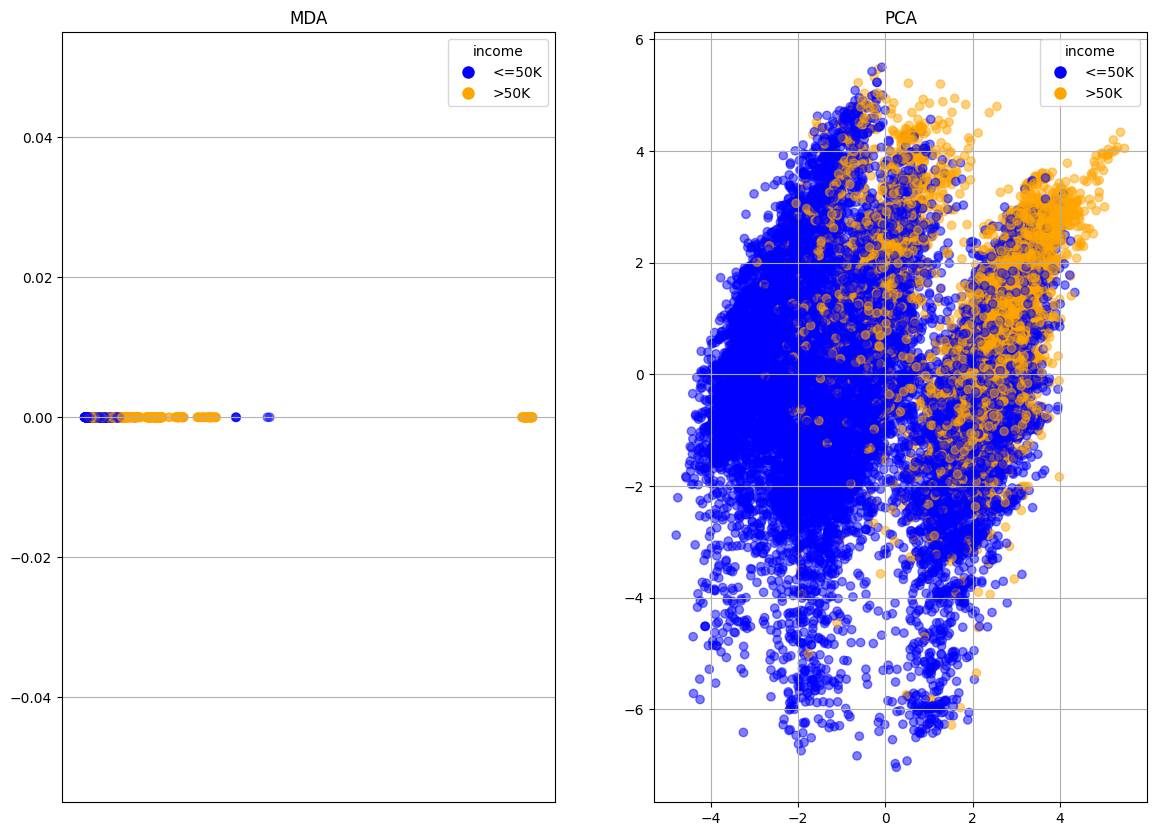

In [19]:
#mostriamo la separazione tra classi dell'MDA
mda=MDA()
mda.fit(X_train, y_train)
Zmda = mda.transform(x)

zero=np.zeros(Zmda.shape[0])
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 10))
axs1[0].scatter(Zmda[:, 0],zero, c=y, cmap=cmap, alpha=0.50)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(0), markersize=10, label='<=50K'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(1), markersize=10, label='>50K')]
axs1[0].legend(handles=handles, title='income')
axs1[0].set_title('MDA')
axs1[0].grid()
axs1[0].set_xticks(np.arange(Zmda[:, 0].min()-1, Zmda[:, 0].max()+1))  
axs1[1].scatter(Zpca[:, 0], Zpca[:, 1], c=y, cmap=cmap, alpha=0.50)
axs1[1].legend(handles=handles, title='income')
axs1[1].set_title('PCA')
axs1[1].grid()

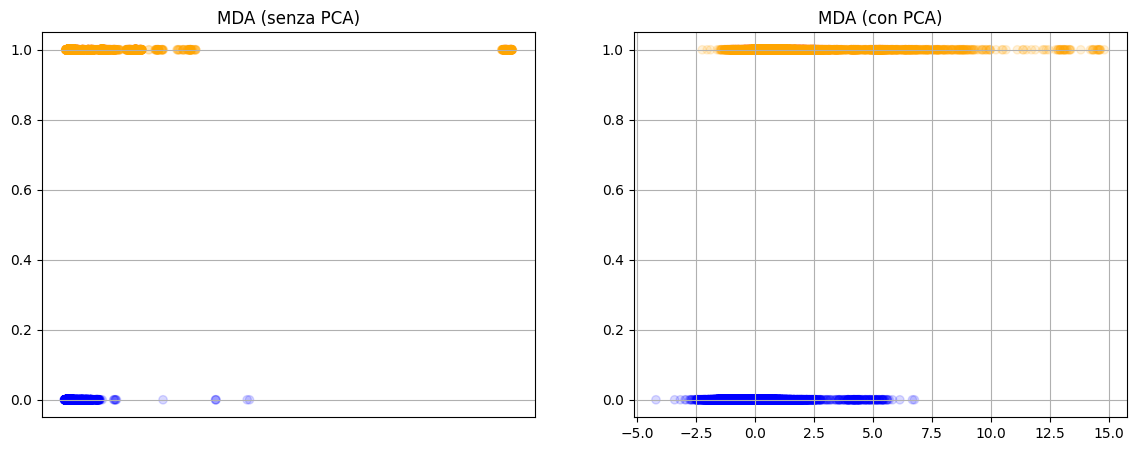

In [20]:
#applichiamo la MDA al campione della PCA
mda_pca=MDA()
mda_pca.fit(Zpca, y)
Zmda_pca = mda_pca.transform(Zpca)

fig1, axs1 = plt.subplots(1, 2, figsize=(14, 5))
axs1[0].scatter(Zmda[:,0].flatten(), y, c=y, cmap=cmap, alpha=0.15)
axs1[0].set_title('MDA (senza PCA)')
axs1[0].grid()
axs1[0].set_xticks(np.arange(Zmda[:, 0].min(), Zmda[:, 0].max()))
axs1[1].scatter(Zmda_pca.flatten(), y, c=y, cmap=cmap, alpha=0.15)
axs1[1].set_title('MDA (con PCA)')
axs1[1].grid()



# LDA

### Introduzione<br>
**Linear Discriminant Analysis** (LDA) è una tecnica di classificazione supervisionata che cerca di trovare una combinazione lineare delle caratteristiche che meglio separa le classi (analogo come la MDA).<br>
La novità è che durante il processo di predizione, LDA calcola le probabilità a priori delle classi e le probabilità condizionate dei dati rispetto a ciascuna classe.<br>
 Utilizzando il teorema di Bayes, LDA stima la probabilità posteriore di ogni classe data una nuova osservazione e assegna la classe con la massima probabilità posteriore, ottimizzando così la separazione e la classificazione dei dati.


### Procedimento<br>

Iniziamo con il mostrare il teorema di Bayes: $
P(Y=k \, |\, X=\boldsymbol{x}) = \frac{P(X=\boldsymbol{x} \, |\, Y=k)\cdot P(Y=k)}{P(X=\boldsymbol{x})}$

1. **Calcolo delle Probabilità A Priori**:<br>
    
    Sia ${\omega}=\{\boldsymbol{\omega}_1,\ldots ,\boldsymbol{\omega}_n\}$ il vettore contenente le diverse classi. <br>
    Calcolare la probabilità a priori $P(\omega_i)$ di ciascuna classe.
    
    $P(\omega_i) = \frac{N_i}{N}$
    
    dove $N_i$ è il numero di campioni nella classe $ \omega_i $ e $ N $ è il numero totale di campioni.

2. **Calcolo delle Probabilità Condizionate**:<br>

    Per ciascuna classe, calcolare la probabilità condizionata $ P(x | \omega_i) $.<br>
    Poiché LDA assume una distribuzione normale multivariata per ciascuna classe, si utilizza la funzione di densità di probabilità della distribuzione normale:<br>

    $P(x | \omega_i) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_i)^T \Sigma^{-1} (x - \mu_i)\right)$<br>

    dove $ \mu_i $ è il vettore medio della classe $ \omega_i $, $ \Sigma $ è la matrice di covarianza (che è la stessa per tutte le classi in LDA) e $ d $ è la dimensione dei dati ${x}\in\mathbb{R}^{d}$.

3. **Calcolo della Probabilità Posteriore**:<br>

    Utilizzare il teorema di Bayes per calcolare la probabilità posteriore $ P(\omega_i | x) $:<br>
    
    $P(\omega_i | x) \propto P(x | \omega_i) P(\omega_i)$<br>
    
    Normalizzare per assicurarsi che le probabilità posteriori sommino a 1 <br>
    (p.e. ho due classi 0,1 la prob. che il mio $x$ sia di classe 1 è 0.84 mentre che sia di classe 0 è del 0.16 . 0.84+0.16=1   ).

4. **Decisione di Classificazione**:<br>

    Assegnare la classe che massimizza la probabilità posteriore:<br>

    $\hat{\omega} = \underset{\omega_i}{\text{argmax}} \, P(\omega_i | x)$<br>

    ovvero si assegna la classe che ha probabilità maggiore di appartenere a quel campione.


In [21]:
#calcolo la precisione con cui il metodo LDA predice dei dati(no PCA)
lda =LDA()
lda.fit(X_train, y_train)

y_pred=lda.predict(X_test)
y_pred_proba=lda.predict_proba(X_test)
y_pred_df= pd.DataFrame({'Pred. Class': y_pred, 
                          'P(Class 0) - %': np.round(y_pred_proba[:, 0] * 100, decimals=2), 
                          'P(Class 1) - %': np.round(y_pred_proba[:, 1] * 100, decimals=2)})
scores_dict = {'Training Set': np.round(lda.score(X_train, y_train)*100, decimals=2), 'Test Set': np.round(lda.score(X_test, y_test) * 100, decimals=2)}
scores = pd.DataFrame(scores_dict, index=['Accuracy'])

display(scores)
display(y_pred_df)


Training Set  Test Set
Accuracy         83.79     83.78

Pred. Class  P(Class 0) - %  P(Class 1) - %
0                0           64.07           35.93
1                0           85.07           14.93
2                0           63.54           36.46
3                0           81.56           18.44
4                0           90.70            9.30
...            ...             ...             ...
15076            0           69.66           30.34
15077            0           64.27           35.73
15078            1           40.30           59.70
15079            0           89.76           10.24
15080            0           99.20            0.80

[15081 rows x 3 columns]

In [22]:
#calcolo la precisione del metodo LDA con PCA
lda_pca =LDA()
lda_pca.fit(pca_adult, y_train)

y_pred=lda_pca.predict(pca.transform(scaler_X.transform(X_test)))
y_pred_proba=lda_pca.predict_proba(pca.transform(scaler_X.transform(X_test)))
y_pred_df= pd.DataFrame({'Pred. Class': y_pred, 
                          'P(Class 0) - %': np.round(y_pred_proba[:, 0] * 100, decimals=2), 
                          'P(Class 1) - %': np.round(y_pred_proba[:, 1] * 100, decimals=2)})
scores_dict = {'Training Set': np.round(lda_pca.score(pca_adult, y_train)*100, decimals=2), 'Test Set': np.round(lda_pca.score(pca.transform(scaler_X.transform(X_test)), y_test) * 100, decimals=2)}
scores = pd.DataFrame(scores_dict, index=['Accuracy'])

display(scores)
display(y_pred_df)


Training Set  Test Set
Accuracy         83.52     83.51

Pred. Class  P(Class 0) - %  P(Class 1) - %
0                0           51.79           48.21
1                0           78.36           21.64
2                0           68.79           31.21
3                0           78.25           21.75
4                0           83.97           16.03
...            ...             ...             ...
15076            0           71.38           28.62
15077            1           41.91           58.09
15078            1           40.30           59.70
15079            0           88.85           11.15
15080            0           98.34            1.66

[15081 rows x 3 columns]

# SVM  Lineare

### Introduzione<br>
Il problema della SVM lineare consiste nel trovare un iperpiano in $\mathbb{R}^n$ che separi i punti dati in due classi, una positiva e una negativa.<br> Un iperpiano è definito come l'insieme di punti x che soddisfano l'equazione $w · x + b = 0$, dove ${w}\in\mathbb{R}^{n}$ è un vettore non nullo normale all'iperpiano e ${b}\in\mathbb{R}$ è uno scalare.<br> L'iperpiano divide lo spazio in due semispazi.


### Procedimento
**Caso separabile**<br>

Si assume che esista un iperpiano che separi perfettamente i punti di training in due popolazioni di punti etichettati positivamente e negativamente.<br> Tuttavia, ci sono infiniti iperpiani che potrebbero separare i dati.<br> L'obiettivo delle SVM è trovare l'iperpiano che massimizza il margine, ovvero la distanza tra l'iperpiano e il punto dati più vicino.<br> Questo iperpiano è chiamato iperpiano a margine massimo e la distanza tra l'iperpiano e i punti dati più vicini è chiamata **margine geometrico**.<br> I punti dati che si trovano sul margine sono chiamati **vettori di supporto**.<br>

Indichiamo rispettivamente l'insieme dei vettori e l'insieme delle classi con ${X}=\{\boldsymbol{x}_1,\ldots ,\boldsymbol{x}_n\}$ e ${Y}=\{\boldsymbol{y}_1,\ldots ,\boldsymbol{y}_n\}$<br>
La funzione obbiettivo diventa:<br>

$
\begin{aligned}
& \underset{w, b}{\text{min}} \, \frac{1}{2} \|w\|^2 \\
& y_i (w \cdot x_i + b) \geq 1 \quad \forall i
\end{aligned}$<br>

dove $ w $ è il vettore dei pesi, $ b $ è il bias, $ x_i $ è il vettore dei punti e $ y_i $ indica la classe.<br>
Successivamente al calcolo del lagrangiano, si ottiene il seguente problema :<br>

\begin{cases}
\min_{\boldsymbol{\alpha}} \frac{1}{2}\boldsymbol{\alpha}^T Q \boldsymbol{\alpha} - \sum_{i=1}^n \alpha_i\\
\sum_{i=1}^n \alpha_i y_i = 0\\
\alpha_i \geq 0\,,\quad \forall \ i=1,\ldots ,n
\end{cases}\,,
dove $\boldsymbol{\alpha}\in\mathbb{R}^n$ e la matrice $Q\in\mathbb{R}^{n\times n}$ è tale che
$Q = \left(q_{i,j}\right)_{i,j=1,\ldots ,n} =  \left( y_iy_j\boldsymbol{x}_i^T\boldsymbol{x}_j \right)_{i,j=1,\ldots ,n}\,$.<br>

A questo punto possiamo scrivere la funzione di decisione, ovvero quella che ci indica la classe di ciascun nuovo vettore, in questo modo:<br>

${f}(x)=\text{sgn}(w · x + b )=\text{sgn}(\sum_{i=1}^n a_i y_i(x_i \cdot x)+b)$<br>

con $b=y_i - \sum_{j=1}^n a_j y_j (x_j \cdot x_i)$<br>

**Caso non separabile**<br>

Nel caso non separabile, non esiste un iperpiano che possa separare perfettamente i punti di training.<br> In questo caso, le SVM cercano di trovare l'iperpiano che massimizza il margine e allo stesso tempo minimizza l'errore di classificazione sui punti di training.<br> Per ottenere ciò, le SVM introducono le variabili slack, che misurano la quantità di violazione del margine consentita per ciascun punto dato.<br>

Il problema Primale diventa quindi

\begin{cases}
\min_{\boldsymbol{w}} \frac{1}{2}\boldsymbol{w}^T\boldsymbol{w} + C \sum_{i=1}^n \xi_i\\
y_i (\boldsymbol{w}^T\boldsymbol{x}_i + b) \geq 1 - \xi_i \,,\quad & \forall \ i=1,\ldots ,n\\
\xi_i\geq 0\,,\quad & \forall \ i=1,\ldots ,n\\
\end{cases}\,,

Il parametro $C\in\mathbb{R}^+$ è un *parametro di regolarizzazione* che caratterizza il rilassamento delle condizioni per il margine:
- $C\rightarrow 0$ aumenta la "*morbidezza*" del margine, permettendo ai vettori $\boldsymbol{x}_i$ di superarlo illimitatamente;
- $C\rightarrow +\infty$ aumenta la "*durezza*" del margine, permettendo ai vettori $\boldsymbol{x}_i$ di superarlo impercettibilmente;


In [23]:
#calcolo la precisione del metodo SVM hard
C_hard = 1e10
loss = 'squared_hinge'
dual = False

lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)
lsvm_hard_pca = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)

lsvm_hard.fit(X_train, y_train)
lsvm_hard_pca.fit(pca_adult, y_train)

df_lsvm_hard = pd.DataFrame({'acc. (no PCA)': [np.round(lsvm_hard.score(X_train, y_train)*100,decimals=2), np.round(lsvm_hard.score(X_test, y_test)*100, decimals=2)],
                             'acc. (PCA)': [np.round(lsvm_hard_pca.score(pca_adult, y_train)*100,decimals=2), np.round(lsvm_hard_pca.score(pca.transform(scaler_X.transform(X_test)), y_test)*100, decimals=2)]},
                            index=['training', 'test'])
display(df_lsvm_hard)

acc. (no PCA)  acc. (PCA)
training          79.44       83.79
test              78.93       84.09

In [24]:
#calcolo la precisione del metodo SVM soft
C_soft = 1e1
loss = 'squared_hinge'
dual = False

lsvm_soft = LinearSVC(C=C_soft, loss=loss, dual=dual, random_state=random_seed)
lsvm_soft_pca = LinearSVC(C=C_soft, loss=loss, dual=dual, random_state=random_seed)

lsvm_soft.fit(X_train, y_train)
lsvm_soft_pca.fit(pca_adult, y_train)

df_lsvm_soft = pd.DataFrame({'acc. (no PCA)': [np.round(lsvm_soft.score(X_train, y_train)*100,decimals=2), np.round(lsvm_soft.score(X_test, y_test)*100, decimals=2)],
                             'acc. (PCA)': [np.round(lsvm_soft_pca.score(pca_adult, y_train)*100,decimals=2), np.round(lsvm_soft_pca.score(pca.transform(scaler_X.transform(X_test)), y_test)*100, decimals=2)]},
                            index=['training', 'test'])
display(df_lsvm_soft)

acc. (no PCA)  acc. (PCA)
training          79.44       83.79
test              78.93       84.09

Notiamo che sia col metodo "hard" sia col metodo "soft" otteniamo la stessa accuratezza. <br>
Mentre invece se applichiamo il metodo SVM al training sample già ridotto dalla PCA l'accuratezza aumenta circa del 5%

# SVM Non lineare

### Introduzione <br>

I Support Vector Machines (SVM) non lineari sono un'estensione degli SVM lineari che possono separare dati non linearmente separabili utilizzando il "Kernel's trick". <br>Questo metodo trasforma i dati in uno spazio di dimensioni superiori dove un iperpiano lineare può separare le classi.

### Procedimento<br>

Sia $X$ lo spazio dei dati, definiamo un funzionale $ \phi : X  \rightarrow {H} $ dove ${H}$ è uno spazio di Hilbert dove ${H}$.<br>
Definiamo ora un Kernel come $K(x , x')=\langle\phi(x),\phi(x')\rangle$ dove $x,x'$ sono vettori.<br>

1. **Mappatura in uno Spazio di Dimensioni Superiori**:<br>

     $$\phi :\mathbb{R}^n\rightarrow \mathbb{R}^m\,, \quad \text{con }m>n\,,$$
     I dati originali vengono mappati in uno spazio di Hilbert di dimensioni superiori utilizzando il funzionale $\phi(x) $.<br> In questo spazio, è più probabile che i dati siano linearmente separabili.<br>
     Siano ${X}=\{\boldsymbol{x}_1,\ldots ,\boldsymbol{x}_n\}$ e ${Y}=\{\boldsymbol{y}_1,\ldots ,\boldsymbol{y}_n\}$ i vettori dei dati e delle classi, allora il vettore $X$ diventa $X^\phi=\{ \phi(x_1), \ldots , \phi(x_n)\}=\{  \boldsymbol{\varphi}_1,\ldots ,\boldsymbol{\varphi}_n\}$.<br>

2. **Problemi con la soluzione precedente**<br>

     Come già mostrato per SVM lineare bisogna risolvere lo stesso problema di ottimizzazione ma sta volta utilizzando $X^\phi$, le soluzioni sono:<br>

     $$\boldsymbol{w}^* = \sum_{i=1}^n y_i\alpha_i^* \boldsymbol{\varphi}_i$$

     $$b^* = \frac{1}{n} \sum_{i=1}^n (y_i - \langle\boldsymbol{w}^*, \boldsymbol{\varphi}_i\rangle)\,$$

     Ora possiamo scrivere la nostra funzione di decisione:<br>

     \begin{aligned}
     \ {f}(x) &= \mathrm{sign}\left( \langle \boldsymbol{w}^* , \phi(\boldsymbol{x})\rangle + b^*\right) = \\
     & = \mathrm{sign}\left(
     \sum_{i=1}^n y_i\alpha_i^* \langle \boldsymbol{\varphi}_i , \boldsymbol{\varphi}\rangle + 
     \frac{1}{n} \sum_{i=1}^n \left(y_i - 
     \sum_{j=1}^n y_j\alpha_j^* \langle\boldsymbol{\varphi}_j ,
     \boldsymbol{\varphi}_i\rangle \right)
     \right)\,
     \end{aligned}
     
     Nella formula sopra, il grosso dei calcoli è richiesto per i _prodotti scalari_ $\langle \boldsymbol{\varphi}_i , \boldsymbol{\varphi}\rangle$ e $\langle\boldsymbol{\varphi}_j ,\boldsymbol{\varphi}_i\rangle$, che vanno svolti in $\mathbb{R}^m$, dove presumibilmente $m\gg n$ (teoricamente anche $m=\infty$). <br>
     Per questo dobbiamo trovare un modo per semplificare i calcoli.

3. **Scelta del kernel**<br>

     Come definito in precedenza, un kernel è una funzione che calcola il prodotto scalare tra due vettori nello spazio di dimensioni superiori senza calcolare esplicitamente $\phi(x)$.<br>
     Mostriamo ora alcuni esempi di kernel più utilizzati(noi faremo un esempio utilizzandone due distinti):<br>

     - **Kernel Lineare**:<br>

         $K(x_i, x_j) = \langle x_i , x_j \rangle$

     - **Kernel Polinomiale**:<br>

         $K(x_i, x_j) = (\gamma\langle x_i , x_j \rangle+ c)^d$

     - **Kernel Radiale di Base (RBF)**:<br>

         $K(x_i, x_j) = \exp\left(-\gamma \langle x_i , x_j \rangle^2\right)$

     - **Kernel Sigmoide**:<br>

         $K(x_i, x_j) = \tanh(\gamma \langle x_i , x_j \rangle + c)$

Una volta scelto il kernell più adatto lo si sostituisce al prodotto scalare e si ottiene la funzione di decisione semplificata.










In [26]:
#testo il primo algoritmo con un kernel sigmoid, tempo medio 29 secondi 
ker_tanh = 'sigmoid'
gamma_tanh = 'auto'

C = 100

svm_tanh_1 = SVC(C=C, kernel=ker_tanh, gamma=gamma_tanh, random_state=random_seed)
svm_tanh_2 = SVC(C=C, kernel=ker_tanh, gamma=gamma_tanh, random_state=random_seed)

svm_tanh_1.fit(X_train, y_train)
svm_tanh_2.fit(pca_adult, y_train)

df_svm_tanh = pd.DataFrame({'acc. (NO PCA)': [np.round(svm_tanh_1.score(X_train, y_train)*100, decimals=2), np.round(svm_tanh_1.score(X_test, y_test)*100,decimals=2)],
                           'acc. (PCA)': [np.round(svm_tanh_2.score(pca_adult, y_train)*100,decimals=2), np.round(svm_tanh_2.score(pca.transform(scaler_X.transform(X_test)), y_test)*100,decimals=2)]},
                          index=['training', 'test'])
df_styled=df_svm_tanh.style.set_caption('SVM SIGMOID')
display(df_styled)

In [27]:
#testo il secondo algoritmo con un kernel rbf, tempo medio 3 minuti 38 secondi
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C = 100

svm_rbf_1 = SVC(C=C, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_seed)
svm_rbf_2 = SVC(C=C, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_seed)

svm_rbf_1.fit(X_train, y_train)
svm_rbf_2.fit(pca_adult, y_train)

df_svm_rbf = pd.DataFrame({'acc. (NO PCA)': [np.round(svm_rbf_1.score(X_train, y_train)*100, decimals=2), np.round(svm_rbf_1.score(X_test, y_test)*100,decimals=2)],
                           'acc. (PCA)': [np.round(svm_rbf_2.score(pca_adult, y_train)*100,decimals=2), np.round(svm_rbf_2.score(pca.transform(scaler_X.transform(X_test)), y_test)*100,decimals=2)]},
                          index=['training', 'test'])
df_styled=df_svm_rbf.style.set_caption('SVM RBF')
display(df_styled)

Per la scelta del kernel migliore bisogna cercare di fare un bilanciamento tra precisione ottenuta e tempo di calcolo.

acc. (PCA)
training       81.97
test           81.77

Text(0.5, 1.0, 'SVM RBF - DECISION BOUNDARY')

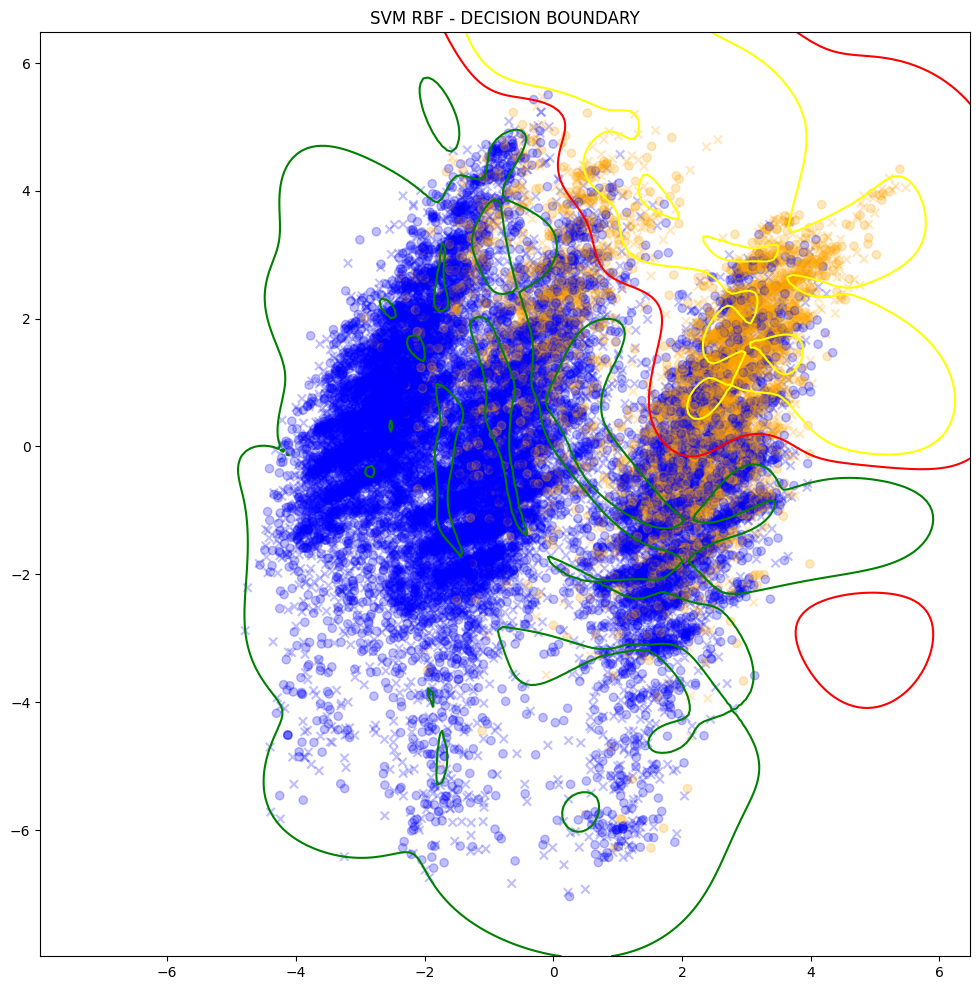

In [28]:
#ora disegno i grafici per il kernel rbf, considerando solo le prime due componenti principali tempo medio 2 minuti 8 secondi
ker_rbf = 'rbf'
gamma_rbf = 'auto'

C = 100

svm = SVC(C=C, kernel=ker_rbf, gamma=gamma_rbf, random_state=random_seed)

svm.fit(pca_adult[:, :2], y_train)

df_svm_rbf = pd.DataFrame({'acc. (PCA)': [np.round(svm.score(pca_adult[:, :2], y_train)*100,decimals=2), np.round(svm.score(pca.transform(scaler_X.transform(X_test))[:, :2], y_test)*100,decimals=2)]},
                          index=['training', 'test'])

display(df_svm_rbf)

minx=min(pca_adult[:, 0].min()-1, pca_adult[:, 1].min()-1)
maxx=max(pca_adult[:, 0].max()+1, pca_adult[:, 1].max()+1)

mesh_points = 200

xx1, xx2 = np.meshgrid(np.linspace(minx, maxx, mesh_points), np.linspace(minx, maxx, mesh_points))

XX = np.concatenate([xx1.reshape(mesh_points ** 2, 1), xx2.reshape(mesh_points ** 2, 1)], axis=1)

ZZ_1 = svm.decision_function(XX)
zz_1 = ZZ_1.reshape(mesh_points, mesh_points)

plt.figure(figsize=(12, 12))
plt.scatter(pca_adult[:, 0], pca_adult[:, 1], c=y_train,marker='x', cmap=cmap, alpha=0.25)
plt.scatter(pca.transform(scaler_X.transform(X_test))[:, 0], pca.transform(scaler_X.transform(X_test))[:, 1], c=y_test,marker='o', cmap=cmap, alpha=0.25)
plt.contour(xx1, xx2, zz_1, [0], colors='red')
plt.contour(xx1,xx2,zz_1,[-1,1],colors=['green','yellow'])
plt.title('SVM RBF - DECISION BOUNDARY')


In [29]:
y_pred = svm_rbf_1.predict(X_test)
y_pred_pca = svm_rbf_2.predict(pca.transform(scaler_X.transform(X_test)))

precision = np.round(precision_score(y_test, y_pred)*100,decimals=2)
recall = np.round(recall_score(y_test, y_pred)*100,decimals=2)
fbeta = np.round(fbeta_score(y_test, y_pred, beta=1.0)*100,decimals=2)

precision_pca = np.round(precision_score(y_test, y_pred_pca)*100,decimals=2)
recall_pca = np.round(recall_score(y_test, y_pred_pca)*100,decimals=2)
fbeta_pca = np.round(fbeta_score(y_test, y_pred_pca, beta=1.0)*100,decimals=2)

df_scores = pd.DataFrame({'Precision': [precision, precision_pca], 'Recall': [recall, recall_pca], 'F1': [fbeta, fbeta_pca]}, index=['NO PCA', 'PCA'])
df_styled = df_scores.style.set_caption('SVM RBF - SCORES')
display(df_styled)